In [382]:
%matplotlib inline
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
plotly.plotly.sign_in("joknowle", "h1w8dn6q7h")
matplotlib.rcParams.update({'font.size': 12, 'font.family': 'calibri', 'mathtext.fontset': 'stix'})

In [383]:
#Constants
amuHydrogen = 1.0079; amuNitrogen = 14.0067; amuOxygen = 15.9994; amuArgon = 39.948;
nMm = amuNitrogen*2; oMm = amuOxygen*2;
mAir = (.78*nMm + .21*oMm + .01*amuArgon)*.001; #composition of dry air. kg/mol
g = 9.81;
e = 2.718281828;
nA = 6.022e23;
Rgas = 0.082057338; # L*atm/Kmol
R = Rgas *.001; #m**3*atm/K*mol
R2 = 8.3146; # J/molK

## Part A:

In [384]:
#Variables
n = [1, 10, 20, 50, 100]; # moles of gas
dof3 = 3; #  Temp < 100 Kelvin
dof5 = 5; #  Temp >= 293.15 Kelvin;
dof7 = 7; #  Temp >= 1000 Kelvin;
gamma3 = ((dof3 + 2)/dof3); # monotomic
gamma5 = ((dof5 + 2)/dof5); # Diatomic
gamma7 = ((dof7 + 2)/dof7);
print('Gamma Values:', gamma3,gamma5,gamma7)
T1 = np.ones(100)*10; T2 = np.ones(100)*100; T3 = np.ones(100)*293; T4 = np.ones(100)*1000;  
x1 = np.linspace(10,100,100);
x2 = np.linspace(100,293,100);
x3 = np.linspace(293,1000,100);
x4 = np.linspace(1000,2000,100);
P = 1;
P1 = np.ones(100)*1;  # 1atm
V1 = np.ones(100)*1; # m**3/mol
constP = np.ones(100)
constV = np.ones(100)

Gamma Values: 1.6666666666666667 1.4 1.2857142857142858


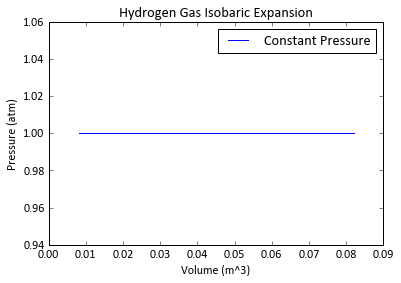

In [385]:
# Isobaric: the gas is held at a constant pressure
# P = 1; n = 1; R = 8.3144598; # J/Kmol
ibVol = (n[1]*R*x1)/constP;
cP = plt.plot(ibVol, constP, label='Constant Pressure')
plt.title('Hydrogen Gas Isobaric Expansion')
plt.xlabel('Volume (m^3)')
plt.ylabel('Pressure (atm)')
plt.legend(handles=cP)
plt.show();

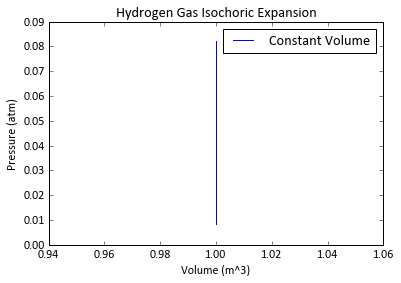

In [386]:
# Isochoric: the gas is held at a constant volume
# V,n,R = constant
icP = n[1]*R*x1/V1;
cP2 = plt.plot(constV, icP, label = 'Constant Volume')
plt.title('Hydrogen Gas Isochoric Expansion')
plt.xlabel('Volume (m^3)')
plt.ylabel('Pressure (atm)')
plt.legend(handles=cP2)
plt.show()

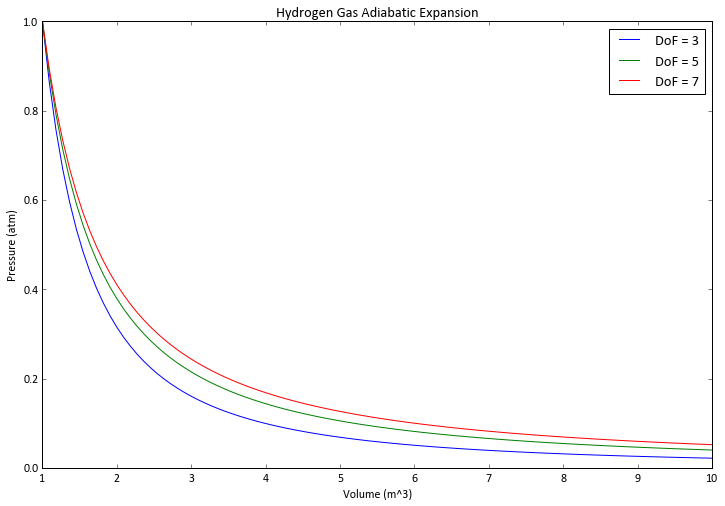

In [387]:
# Adiabatic: No heat flows in or out of the gas; n,R = constant
# Adiabatic Compression: Solve for Volume curve.
# adiaExpans; P_1*vGamma1 = P_2*vGamma2; T_1*vGammaSub1 = T_2*vGammaSub2;
fig, ax = plt.subplots(figsize=(12, 8))

adiaV = np.linspace(1,10,100);
adiaP3 = P1*(V1/adiaV)**(gamma3); # f=3:
adiaP5 = P1*(V1/adiaV)**(gamma5); # f=5
adiaP7 = P1*(V1/adiaV)**(gamma7); # f=7
aF3, = plt.plot(adiaV, adiaP3, label='DoF = 3');
aF5, = plt.plot(adiaV, adiaP5, label='DoF = 5');
aF7, = plt.plot(adiaV, adiaP7, label='DoF = 7');

plt.title('Hydrogen Gas Adiabatic Expansion')
plt.xlabel('Volume (m^3)')
plt.ylabel('Pressure (atm)')
plt.legend(handles=[aF3, aF5, aF7])
plt.show();

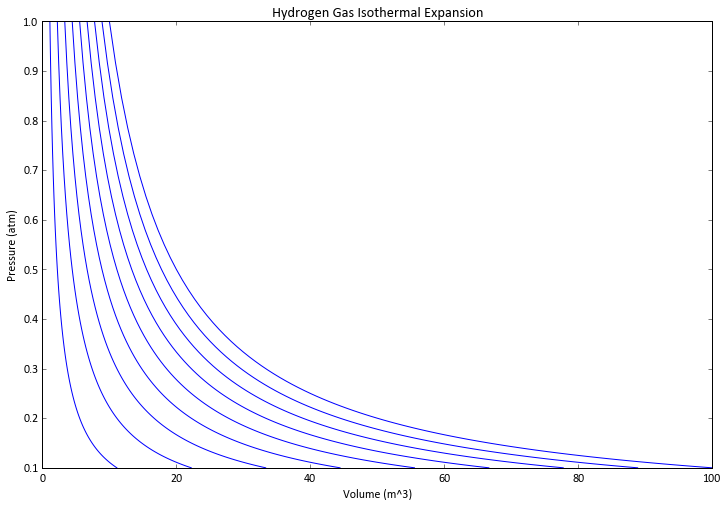

In [388]:
# Isothermal: the gas is held at a constant temperature
fig, ax = plt.subplots(figsize=(12, 8))
z = np.linspace(.0001,10,10)
isothermV = np.linspace(1,10,100);
isothermP = P1*V1/isothermV;
for x in z:
    plt.plot(x*isothermV, isothermP, 'b');
    plt.title('Hydrogen Gas Isothermal Expansion')
    plt.xlabel('Volume (m^3)')
    plt.ylabel('Pressure (atm)')
plt.show();

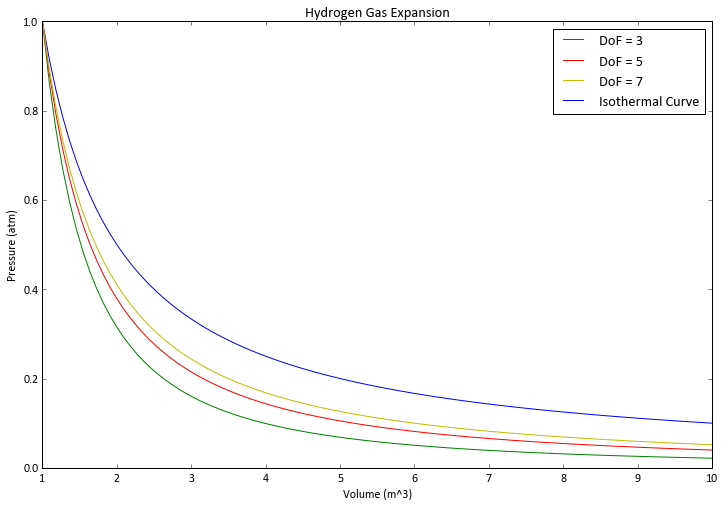

In [389]:
fig, ax = plt.subplots(figsize=(12, 8))
isothermPV, = plt.plot(isothermV, isothermP, 'b', label='Isothermal Curve');
aF3, = plt.plot(adiaV, adiaP3, 'g', label='DoF = 3');
aF5, = plt.plot(adiaV, adiaP5, 'r', label='DoF = 5');
aF7, = plt.plot(adiaV, adiaP7, 'y', label='DoF = 7');

plt.title('Hydrogen Gas Expansion')
plt.xlabel('Volume (m^3)')
plt.ylabel('Pressure (atm)')
plt.legend(handles=[aF3, aF5, aF7, isothermPV])
plt.show();

**What is different about these different plots?  Does the isothermal plot change with temperature? Give a physical explanation for the differences.**

It's clear that pressure is dependant on volume, but the relationship between those two variables is quite different for each of the expansion processes. Ideally, the isothermal curve would be replicated to show the crossover event of the steep adiabatic curves. The curves are unique and make up a complete thermodynamic cycle. 

Isothermal curves are meant to stay at constant temperatures, whereas adiabatic curves will move from one designated temperature and its associated isothermal curve, to another temperature with its own unique isothermal curve. Isobaric and Isochoric processes were expected to be constant in some plane, and so it was found to be just the case. 

Adiabatic curves with lower degrees of freedom were found to have higher steepness to their curves, which each successive system with higher degrees of freedom were found to not be such a dramatic swooper. This suggests that the more degrees of freedom a system has, the more energy can be taken into the system given some temperature.


## Part B:

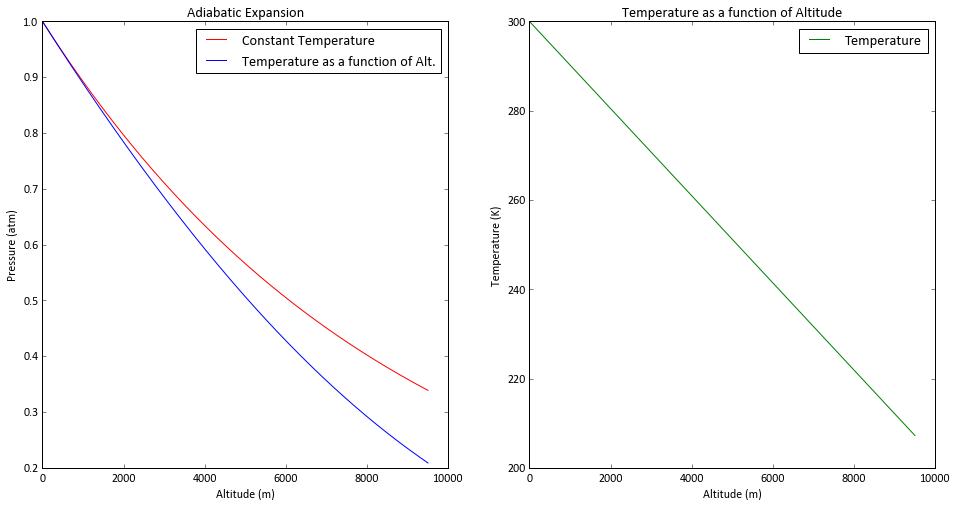

In [390]:
fig, ax = plt.subplots(1,2, figsize=(16, 8))
alt = np.linspace(0,9500, 1000)
Tconst = 300;
Ti = -2*mAir*g/((dof5+2)*R2); 
Tz = np.ones(1000); Tz[0] = Ti;
for i, x in enumerate(alt):
    Tz[i] = (300 + Ti*x);
finP = P*e**(-mAir*g*alt/(R2*Tconst))
finP2 = P*e**(-mAir*g*alt/(R2*Tz))
#print(Tz)
a, = ax[0].plot(alt, finP, 'r', label='Constant Temperature');
a2, = ax[0].plot( alt, finP2, 'b', label='Temperature as a function of Alt.')
ax[0].set_title('Adiabatic Expansion')
ax[0].set_xlabel('Altitude (m)')
ax[0].set_ylabel('Pressure (atm)')
ax[0].legend(handles=[a,a2])
b, = ax[1].plot(alt, Tz, 'g', label='Temperature');
ax[1].set_title('Temperature as a function of Altitude')
ax[1].set_xlabel('Altitude (m)')
ax[1].set_ylabel('Temperature (K)')
ax[1].legend(handles=[b])
plt.show();


**What happens to the temperature as the gas rises and why (use the 1st Law in your explanation)?  How does this effect account for rain on one side of the mountain ranges (the western slope) and a desert on the other side (the east slope)? Note: This is different than the assumption in 1.40 where it is assumed that the pressure difference due to temperature and altitude are balanced.**

The temperature of hydrogen gas as it rises through the air decreases. Given some packet volume of hydrogen gas, we know that the higher the packet goes, the cooler it becomes. This is because there's less mass exerting force from above, and so there's a decrease in pressure. Given the conditions ΔU=Q+W, where Q=0 such that ΔU=W, we can see that in the process of expansion, the gas does the work, which releases heat into the external environment and which translates to lower temperatures. 


## Part C:

In [435]:
Trange = np.linspace(200,600,20);
Vrange = np.linspace(.1,2,20)
threeDeeP = np.zeros((20,20))
for i, x in enumerate(Trange):
    for j, y in enumerate(Vrange):
        threeDeeP[j][i] = n[1]*R*x/y;
cls=[[0, 'rgb(0,0,131)'], [0.125, 'rgb(0,60,170)'], [0.375, 'rgb(5,255,255)'], 
     [0.625, 'rgb(255,255,0)'], [0.875, 'rgb(250,0,0)'], [1, 'rgb(128,0,0)']]
trace1 = go.Surface(x = Trange, y = Vrange, z = threeDeeP, colorscale = cls)
data = go.Data([trace1])
layout = go.Layout(
    title = '3D Surface Plot of P(V,T)', autosize=True, width=500, height=500, margin=dict(l=0, r=0, b=0, t=0),
    scene = go.Scene(
        xaxis = dict(
            title = 'Temperature'
        ),
        yaxis = dict(
            title = 'Volume'
        ),
        zaxis = dict(
            title = 'Pressure'
        )
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='P(V,T)')

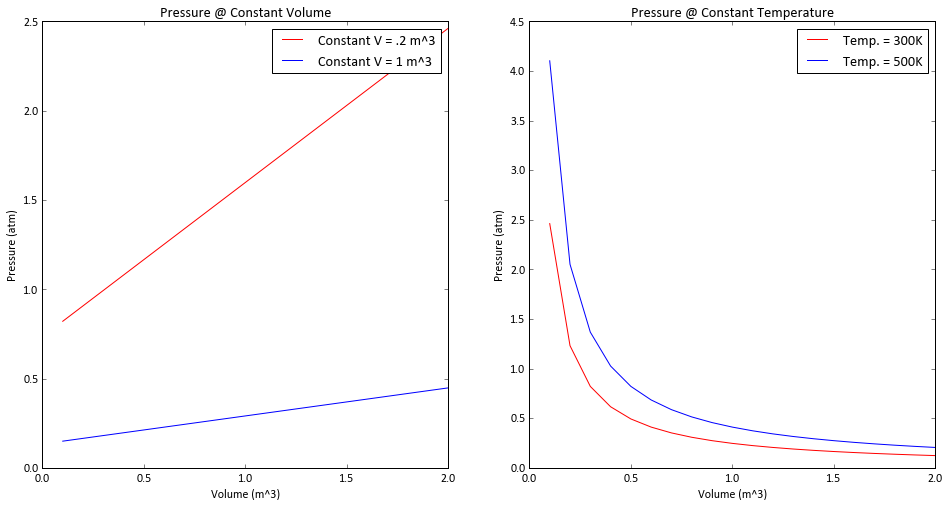

In [458]:
fig, ax = plt.subplots(1,2, figsize=(16, 8))
threeDeeP2 = n[1]*R*Trange/Vrange[1];
threeDeeP3 = n[1]*R*Trange/Vrange[10];
threeDeeP4 = n[1]*R*300/Vrange;
threeDeeP5 = n[1]*R*500/Vrange;
a, = ax[0].plot(Vrange, threeDeeP2, 'r', label='Constant V = .2 m^3');
a2, = ax[0].plot( Vrange, threeDeeP3, 'b', label='Constant V = 1 m^3')
ax[0].set_title('Pressure @ Constant Volume')
ax[0].set_xlabel('Volume (m^3)')
ax[0].set_ylabel('Pressure (atm)')
ax[0].legend(handles=[a,a2])

b, = ax[1].plot(Vrange, threeDeeP4, 'r', label='Temp. = 300K');
b2, = ax[1].plot(Vrange, threeDeeP5, 'b', label='Temp. = 500K');
ax[1].set_title('Pressure @ Constant Temperature')
ax[1].set_xlabel('Volume (m^3)')
ax[1].set_ylabel('Pressure (atm)')
ax[1].legend(handles=[b,b2])
plt.show();

**In a graphical sense, how do these two graphs relate to the 3-D surface plot you created?  What do the partial derivatives (∂P⁄∂T)_V and (∂P⁄∂V)_T correspond to on your 3-D graph (you don’t have to compute them, unless you’d like to)?**

The two graphs where pressure is a function of constant volume or constant temperature represents slices to the 3D plot above. These slices are generated perpendicularly. The partial derivatives also represent cross-sections of the 3D surface. 

## Part D:

In [729]:
set_printoptions(precision=1)
D = 1; dx = np.linspace(1,20,20); di = np.linspace(0,20,20); N = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1];
dt = np.linspace(0,3,30)
calcN = np.zeros((20,30));  #i, j
for i in range(20):
    for j in range(30):
        if i > 9:
            calcN[i][0] = 1
        calcN[19][j] = 1;
for i2 in range(18, 0, -1):
    for j2 in range(1,30):
        calcN[i2][j2] = calcN[i2][j2-1]-D/(1**2)*(2*calcN[i2][j2-1] - calcN[i2-1][j2-1] - calcN[i2+1][j2-1])*.1
# i columns, j rows. 

cls=[[0, 'rgb(0,0,131)'], [0.125, 'rgb(0,60,170)'], [0.375, 'rgb(5,255,255)'], 
     [0.625, 'rgb(255,255,0)'], [0.875, 'rgb(250,0,0)'], [1, 'rgb(128,0,0)']]
trace1 = go.Surface(x = dt, y = di, z = calcN, colorscale = cls)
data = go.Data([trace1])
layout = go.Layout(
    title = '1-D T.Dependant Diffusion of Particles in a Box', autosize=True, width=500, height=500, margin=dict(l=0, r=0, b=0, t=0),
    scene = go.Scene(
        xaxis = dict(
            title = 'Time (in units of time)'
        ),
        yaxis = dict(
            title = 'Microstate Position'
        ),
        zaxis = dict(
            title = 'Particles in the microstate'
        )
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='1-D Time Dependent Diffusion of Particles in a Box')

**Explain what happens when you change each of these quantities.  Add one of your new 3D plots with different starting conditions in your report and qualitatively describe what happened.**

Initially, we have a relatively large amount of particles in the 10-20th microstates. As time progresses, the system finds equilibrium when the particles move towards the vacant part of the system. At the end of the time-line given, I would have supposed a relatively balanced system where equal amount of particles occupied both halves, but it doesn't appear to be. I suspect that this process would happen almost instantaneously, but I'm uncertain. Perhaps I math'd too hard. 

In [730]:
for i in range(20):
    for j in range(30):
        if i == 18:
            calcN[i][0] = 7;
        calcN[19][j] = 1;
for i2 in range(18, 0, -1):
    for j2 in range(1,30):
        calcN[i2][j2] = calcN[i2][j2-1]-D/(1**2)*(2*calcN[i2][j2-1] - calcN[i2-1][j2-1] - calcN[i2+1][j2-1])*.1
# i columns, j rows. 

cls=[[0, 'rgb(0,0,131)'], [0.125, 'rgb(0,60,170)'], [0.375, 'rgb(5,255,255)'], 
     [0.625, 'rgb(255,255,0)'], [0.875, 'rgb(250,0,0)'], [1, 'rgb(128,0,0)']]
trace1 = go.Surface(x = dt, y = di, z = calcN, colorscale = cls)
data = go.Data([trace1])
layout = go.Layout(
    title = '1-D T.Dependant Diffusion of Particles in a Box', autosize=True, width=500, height=500, margin=dict(l=0, r=0, b=0, t=0),
    scene = go.Scene(
        xaxis = dict(
            title = 'Time (in units of time)'
        ),
        yaxis = dict(
            title = 'Microstate Position'
        ),
        zaxis = dict(
            title = 'Particles in the microstate'
        )
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='1-D Time Dependent Diffusion of Particles in a Box')